In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nhm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nhmv10.txt', sep = '\t', dtype = {'site_no': str})
df_nhm.index = pd.to_datetime(df_nhm['UTC_date'])
df_nhm.head()

,site_no,UTC_date,q_cms_obs,q_cms_mod,tag
UTC_date,,,,,
1983-10-01,01417000,1983-10-01,1.880239,2.970378,nhmv1
1983-10-02,01417000,1983-10-02,1.976516,3.046074,nhmv1
1983-10-03,01417000,1983-10-03,1.987843,3.102649,nhmv1
1983-10-04,01417000,1983-10-04,1.982179,3.100692,nhmv1
1983-10-05,01417000,1983-10-05,2.010496,3.012292,nhmv1


In [3]:
### explore modeled & observed streamflow data from Aubrey Dugger (NCAR)
df_nwm = pd.read_csv('input_data/modeled_gages/streamflow_daily_nwmv21.txt', sep = '\t', dtype = {'site_no': str})
df_nwm.index = pd.to_datetime(df_nwm['UTC_date'])
df_nwm.tail()

,site_no,UTC_date,q_cms_obs,q_cms_mod,tag
UTC_date,,,,,
2016-12-27,01481500,2016-12-27,6.399607,10.205416,NWMV21_FullRouting_Retro
2016-12-28,01481500,2016-12-28,6.144756,9.650833,NWMV21_FullRouting_Retro
2016-12-29,01481500,2016-12-29,6.512875,8.673750,NWMV21_FullRouting_Retro
2016-12-30,01481500,2016-12-30,7.334063,9.230000,NWMV21_FullRouting_Retro
2016-12-31,01481500,2016-12-31,6.173073,10.423333,NWMV21_FullRouting_Retro


In [4]:
### reshape dataframe to have gages as columns
ndays = len(set(df_nhm['UTC_date']))

sites = list(set(df_nhm['site_no']))

obs = df_nhm.iloc[:ndays, -1:]
nhm = df_nhm.iloc[:ndays, -1:]
nwm = df_nwm.iloc[:ndays, -1:]
for site in sites:
    obs[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_obs']
    nhm[site] = df_nhm.loc[df_nhm['site_no'] == site, 'q_cms_mod']
    nwm[site] = df_nwm.loc[df_nwm['site_no'] == site, 'q_cms_mod']
obs.drop('tag', axis=1, inplace=True)
nhm.drop('tag', axis=1, inplace=True)
nwm.drop('tag', axis=1, inplace=True)

### convert cms -> mgd
obs *= 22.82
nhm *= 22.82
nwm *= 22.82

nwm.head()

,01431500,01437500,01479000,01429000,01433500,01427207,01455500,01425000,01463500,01449800,...,01454700,01474500,01434000,01459500,01473000,01438500,01480015,01446500,01417000,01480685
UTC_date,,,,,,,,,,,,,,,,,,,,,
1983-10-01,29.399766,100.949973,40.163199,6.389600,65.426840,209.278412,13.2356,58.190999,1366.233369,45.639999,...,343.621651,458.824615,475.207473,43.586199,49.224641,591.684553,23.276399,749.846167,75.153865,0.6846
1983-10-02,29.152549,100.246356,40.058607,6.332550,65.265199,208.242004,13.2356,58.190999,1344.649453,45.639999,...,340.864234,457.826240,471.812998,43.310457,49.528907,589.811412,23.048199,743.199842,74.431232,0.6846
1983-10-03,28.905333,99.818481,39.934999,6.161400,65.151099,207.300679,13.2356,58.190999,1321.277970,45.639999,...,338.705842,448.546107,468.760823,43.044224,49.110541,585.732337,23.000658,737.124017,73.718107,0.6846
1983-10-04,28.648608,99.314539,39.754341,6.161400,65.036999,206.692145,13.2356,58.190999,1303.554438,45.639999,...,336.690076,441.928307,465.870290,42.787499,47.960032,582.575570,22.819999,731.618692,73.023998,0.6846
1983-10-05,28.382374,98.962731,39.630732,6.123367,64.903882,206.387879,13.2356,58.190999,1290.432938,45.639999,...,334.693326,437.801690,463.207956,42.521266,48.254791,579.152570,22.715408,727.130759,72.339398,0.6846


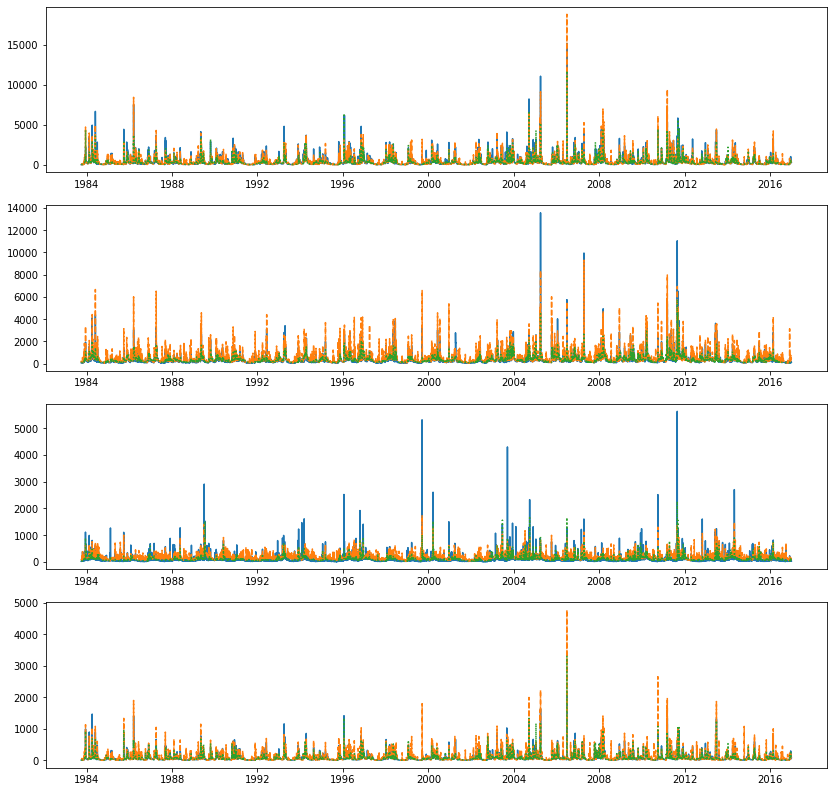

In [5]:
### compare estimates from models & observations
num_sites = 9
fig, axs = plt.subplots(4,1, figsize=(14,14))
axnum = 0
for i in range(4):
    ax = axs[i]
    ax.plot(obs[sites[axnum]])
    ax.plot(nhm[sites[axnum]], ls='--')
    ax.plot(nwm[sites[axnum]], ls=':')
    axnum += 1



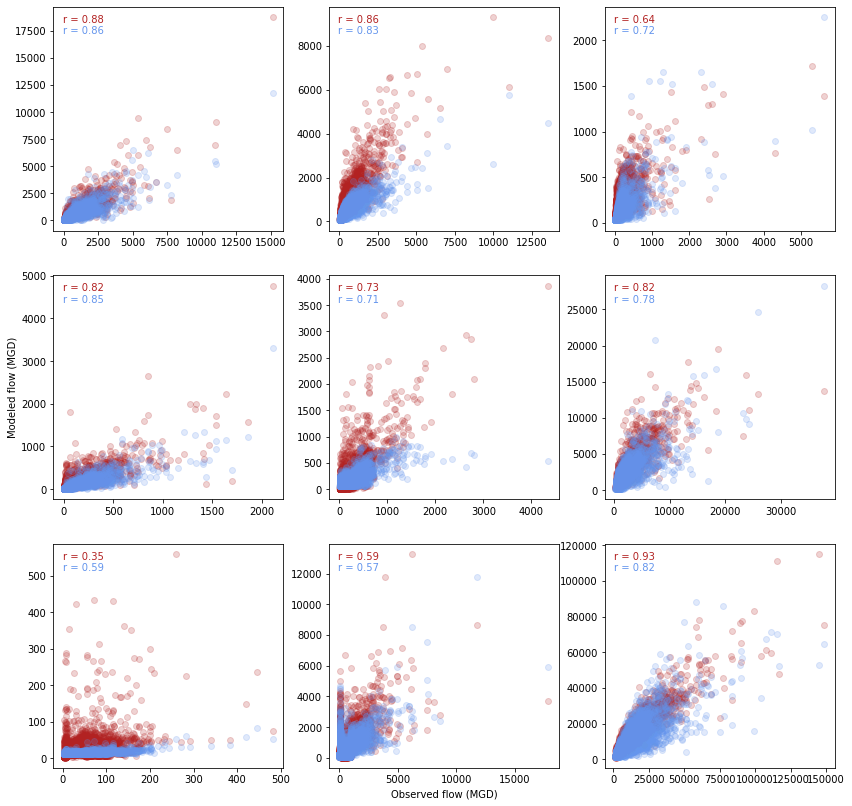

In [6]:
### compare estimates from models & observations
import numpy.ma as ma

def corrcoef_nan_masked(a, b, log=False):
    if log:
        a = np.log(a + 0.01)
        b = np.log(b + 0.01)
    return round(ma.corrcoef(ma.masked_invalid(a), ma.masked_invalid(b))[0,1], 2)

### evaluate fit with NSE
def nse(predictions, targets, log=False):
    if log:
        predictions = np.log(predictions + 0.01)
        targets = np.log(targets + 0.01)
    return round(1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)), 2)

import hydroeval as he

num_sites = 9
fig, axs = plt.subplots(3,3, figsize=(14,14))
axnum = 0
for i in range(3):
    for j in range(3):
        ax = axs[i,j]
        ax.scatter(obs[sites[axnum]], nhm[sites[axnum]], color='firebrick', alpha=0.2, zorder=2)
        ax.scatter(obs[sites[axnum]], nwm[sites[axnum]], color='cornflowerblue', alpha=0.2, zorder=3)
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nhm[sites[axnum]])}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
        ax.annotate(f'r = {corrcoef_nan_masked(obs[sites[axnum]], nwm[sites[axnum]])}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
        if i == 1 and j == 0:
            ax.set_ylabel('Modeled flow (MGD)')
        elif i == 2 and j == 1:
            ax.set_xlabel('Observed flow (MGD)')
        axnum += 1

### note: it's not necessarily bad that many of these aren't great fit, because nhm/nwm don't account for mgmt. 
###       e.g. see next cell, where observed flows below NYC reservoirs are much lower than modeled due to demand.

### Matching strategy 1: rescale flows downstream of reservoir to have mean == GRanD meanflow

In [7]:
### link to reservoirs & set up for input to pywr
istarf = pd.read_csv('model_data/drb_model_istarf_conus.csv') 
meanflows = {istarf.iloc[i,:].loc['reservoir']: istarf.iloc[i,:].loc['GRanD_MEANFLOW_MGD'] for i in range(istarf.shape[0])}
site_matches_reservoir = {'cannonsville': '01425000',
                'pepacton': '01417000',
                'neversink': '01436000', 
                'wallenpaupack': '01429000',  ## Note, wanted to do 01431500 minus 01432110, but don't have latter from Aubrey, so use Prompton for now
                'prompton': '01429000',
                'shoholaMarsh': '01429000',  ## Note, should have 01432495, but not didnt get from Aubrey, so use Prompton for now
                'mongaupeCombined': '01433500',
                'beltzvilleCombined': '01449800',
                'fewalter': '01447800',
                'merrillCreek': '01459500',  ## Merrill Creek doesnt have gage - use Nockamixon nearby to get flow shape
                'hopatcong': '01455500',
                'nockamixon': '01459500', 
                'assunpink': '01463620', 
                'ontelaunee': '01470960',  ## Note, should have 01470761, but didnt get from Aubrey, so use Blue Marsh
                'stillCreek': '01469500',
                'blueMarsh': '01470960',
                'greenLane': '01473000',
                'marshCreek': '01480685'
                }

for reservoir, site in site_matches_reservoir.items():
    obs_meanflow = obs[site].mean()
    nhm_meanflow = nhm[site].mean()
    nwm_meanflow = nwm[site].mean()
    
    print(reservoir, obs_meanflow, nhm_meanflow, nwm_meanflow, meanflows[reservoir])

cannonsville 404.90585639043815 533.047137198335 454.04460439999747 561.5959693
pepacton 168.99313830615844 485.3310161642009 360.72128475381595 474.7260543
neversink 55.16080670822157 174.18708578096357 129.8581659157104 117.9796613
wallenpaupack 72.76478940395208 79.40521843984632 60.73360964337621 245.9792628
prompton 72.76478940395208 79.40521843984632 60.73360964337621 8.559174497
shoholaMarsh 72.76478940395208 79.40521843984632 60.73360964337621 61.67170531
mongaupeCombined 219.36565344067898 252.7064195358714 198.1245344540568 243.1262046
beltzvilleCombined 111.34292203421172 84.57632340183616 91.55683715712387 116.5417199
fewalter 421.42250104175497 242.28693882312857 378.34385447422454 8.559174497
merrillCreek 110.69283508685047 100.42311782395608 95.33940409944445 3.355196403
hopatcong 32.65873459425588 24.764481741730023 15.28799681510095 31.15539517
nockamixon 110.69283508685047 100.42311782395608 95.33940409944445 83.49189416
assunpink 29.601378314881703 33.07518082967682 

In [8]:
### match gages to get catchments for mainstem links, subtracting upstream reservoir/link
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
#                 ['delLackawaxen', ['01432110', '01428500'], ['prompton','wallenpaupack','delLordville']],
#                 ['delMontague', ['01438500'], ['delLackawaxen', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
#                 ['delLehigh', ['01454700', '01446500'], ['delMontague', 'beltzvilleCombined', 'fewalter']], # should include , '01446775' too, but not included by Aubrey. And really should just use 01457500, downstream of junction
                ['delTrenton', ['01463500'], ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                ['outletAssunpink', ['01463620'], ['assunpink']], ## note, should get downstream junction, just using reservoir-adjacent gage for now
                ['outletSchuylkill', ['01474500'], ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                ['outletChristina', ['01480685'], ['marshCreek']] ## note, should use ['01481500, 01480015, 01479000, 01478000'], but dont have yet. so use marsh creek gage for now.
                ]

def get_inflows(dataset, label, grandScaled=True):
    ### first setup inflows for reservoirs
    for reservoir, site in site_matches_reservoir.items():
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(dataset.loc[:, site])
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = dataset[site]
        ## rescale based on grand meanflow
        if grandScaled:
            inflow[reservoir] *= meanflows[reservoir] / inflow[reservoir].mean()

    ## now setup inflows for downstream junctions
    for node, sites, upstreams in site_matches_link:
        inflow[node] = dataset.loc[:, sites].sum(axis=1)
        if grandScaled:
            inflow[node] -= inflow.loc[:, upstreams].sum(axis=1)
            ## make sure no flows are negative after rescaling/subtraction
            inflow[node].loc[inflow[node] < 0] = 0
                
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow

obs_inflow = get_inflows(obs, 'obs_scaled')
obs_outflow = get_inflows(obs, 'obs_noScaled', False)
nhm_inflow = get_inflows(nhm, 'nhmv10_scaled')
nwm_inflow = get_inflows(nwm, 'nwmv21_scaled')
obs_outflow.loc[obs_outflow.index.year == 2008]

,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,merrillCreek,...,stillCreek,blueMarsh,greenLane,marshCreek,delLordville,delMontague,delTrenton,outletAssunpink,outletSchuylkill,outletChristina
UTC_date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,969.285659,462.026164,54.603092,126.653326,126.653326,126.653326,NaN,269.461413,801.276145,271.399984,...,100.159518,541.507588,525.999018,24.490618,2946.628403,7689.666227,18157.951342,63.778996,3999.918819,24.490618
2008-01-02,969.285659,462.672354,62.615854,114.375708,114.375708,114.375708,NaN,248.783319,788.352336,182.225704,...,89.174281,538.922826,367.036169,8.335857,2888.471263,7301.951963,16994.808552,55.830854,3386.037902,8.335857
2008-01-03,969.285659,463.318545,62.938949,89.820471,89.820471,89.820471,NaN,175.117609,640.374725,109.206184,...,75.604281,433.593785,231.336177,8.335857,2526.604617,6655.761524,15250.094366,44.651759,2894.933168,8.335857
2008-01-04,969.285659,463.318545,50.273616,76.250472,76.250472,76.250472,NaN,129.238088,409.684738,71.080948,...,67.203806,257.829985,180.933323,8.335857,2507.218904,5919.104423,12859.189741,37.672903,2319.823677,8.335857
2008-01-05,969.285659,463.318545,42.131617,77.542853,77.542853,77.542853,NaN,116.960470,414.854262,55.507759,...,63.262044,193.857132,172.532847,7.237333,2507.218904,5602.471108,11502.189818,31.469474,2016.114170,7.237333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-27,962.823754,463.318545,124.068564,176.409990,176.409990,176.409990,NaN,383.837121,1537.933245,257.829985,...,149.916182,969.285659,505.967114,38.125236,3734.980739,8852.809017,21776.617802,60.548044,6093.575842,38.125236
2008-12-28,962.823754,463.318545,124.068564,191.272370,191.272370,191.272370,NaN,383.837121,1466.852297,220.997130,...,158.962848,697.885674,495.628067,38.125236,4555.642597,8594.332842,19514.951265,54.473854,4988.590191,38.125236
2008-12-29,956.361850,506.613304,129.884278,271.399984,271.399984,271.399984,NaN,382.544740,1499.161819,191.918560,...,158.316658,356.050932,413.561881,38.125236,5744.633005,11502.189818,20290.379792,49.885902,4271.318803,38.125236


### Matching strategy 2: scale upstream flow gage to have same mean as downstream gage minus demand (observed flows only for now)

In [9]:
### for each node, list [name, [inflows with sign], [outflows with sign], mean_annual_demand_MGD]
site_matches_reservoir = [['cannonsville', ['01423000', '+', '0142400103'], ['01425000'], 250],
                          ['pepacton', ['01413500', '+', '01415000', '+', '01414500', '+', '01414000'], ['01417000'], 250],
                          ['neversink', ['01435000'], ['01436000'], 250],
                          ['wallenpaupack', ['01428750'], ['01432110', '-', '01431500'], 0],  ## no direct outflow, so use lackawaxen flow a way DS, minus flow just US of wallenpaupack entering. No inflow, so use prompton inflow for flow shape.
                          ['prompton', ['01428750'], [ '01429000'], 0],
                          ['shoholaMarsh', ['01428750'], ['01429000'], 0],  ## doesnt have either gage (there is one but only to 2018). use prompton for now
                          ['mongaupeCombined', ['01428750'], ['01433500'], 0],   ## this inflow is still DS of at least one reservoir, but smaller
                          ['beltzvilleCombined', ['01449360'], ['01449800'], 0],
                          ['fewalter', ['01447500', '+', '01447720'], ['01447800'], 0],  ## note, second inflow gage ..720 does have inflow from some upstream lakes, may be regulated
                          ['merrillCreek', ['01459500'], ['01459500'], 0],  ## Merrill Creek doesnt have any gages, use nockamixon for now
                          ['hopatcong', ['01455500'], ['01455500'], 0],  ## doesnt have inflow gage
                          ['nockamixon', ['01459500'], ['01459500'], 0],  ## doesnt have inflow gage 
                          ['assunpink', ['01463620'], ['01463620'], 0],  ## doesnt have inflow gage, and note this outflow is a ways DS past another dam, Mercer Lake 
                          ['ontelaunee', ['01470755'], ['01470755'], 0],  ## doesnt have outflow gage (except 2020+), use inflow for now
                          ['stillCreek', ['01469500'], ['01469500'], 0], ## doesnt have inflow gage
                          ['blueMarsh', ['01470779'], ['01470960'], 0],
                          ['greenLane', ['01472198', '+', '01472199'], ['01473000'], 0],  ## outflow is pretty far DS, significant inflows below
                          ['marshCreek', ['01480675'], ['01480685'], 0]
                         ]
### for each mainstem node, list [name, [flow gages to add], [upstream nodes to subtract]]
site_matches_link = [['delLordville', ['01427207'], ['cannonsville', 'pepacton']],
                     ['delMontague', ['01438500'], ['prompton','wallenpaupack','delLordville', 'shoholaMarsh', 'mongaupeCombined', 'neversink']],
                     ['delTrenton', ['01463500'], ['delMontague', 'beltzvilleCombined', 'fewalter', 'merrillCreek', 'hopatcong', 'nockamixon']],
                     ['outletAssunpink', ['01464000'], ['assunpink']],
                     ['outletSchuylkill', ['01474500'], ['ontelaunee', 'stillCreek', 'blueMarsh', 'greenLane']],
                     ['outletChristina', ['01481500', '+', '01480015', '+', '01479000', '+', '01478000'], ['marshCreek']] 
                    ]

In [10]:
import os
import warnings
warnings.filterwarnings('ignore')

input_data_path = './input_data/usgs_gages/'
input_data_files = os.listdir(input_data_path)
start_year = 2008
end_year = 2015
plot = False

def get_daily_data_site(site):
    print(site)
    filename = [f for f in input_data_files if site in f][0]
    filename = input_data_path + filename
    for s in range(25, 40):
        try:
            df = pd.read_csv(filename, skiprows=s, sep='\t').iloc[1:,]
            df.index = pd.to_datetime(df['datetime'])
            colname = [col for col in df.columns if '_00060' in col][0]
            break
        except:
            pass
    df = pd.to_numeric(df[colname])
    df_agg = df.resample('D').mean()
    
    ### remove data before start_year & after end_year
    df_agg = df_agg.loc[np.logical_and(df_agg.index.year >= start_year, df_agg.index.year <= end_year)]
    ### replace NANs or negatives with 0 (note, should consider better method..)
    df_agg.loc[np.logical_or(np.isnan(df_agg), df_agg < 0)] = 0.
    ### convert cfs to mgd
    df_agg *= 0.0283 * 22824465.32 / 1e6
    
    if plot:
        plt.figure()
        plt.plot(df_agg)
        plt.title(site)
    return df_agg
    
def get_inflows_2(label):
    ### first setup inflows for reservoirs
    for reservoir, upstreams, downstreams, demand in site_matches_reservoir:
        upstream = get_daily_data_site(upstreams[0])
        if len(upstreams) > 1:
            num_sites = int(len(upstreams) / 2) + 1
            for i in range(num_sites - 1):
                if upstreams[i * 2 + 1] == '+':
                    upstream += get_daily_data_site(upstreams[i * 2 + 2])
                elif upstreams[i * 2 + 1] == '-':
                    upstream -= get_daily_data_site(upstreams[i * 2 + 2])
                else:
                    print('Warning: reservoir {reservoir} upstream list not set up correctly')
        downstream = get_daily_data_site(downstreams[0])
        if len(downstreams) > 1:
            num_sites = int(len(downstreams) / 2) + 1
            for i in range(num_sites - 1):
                if downstreams[i * 2 + 1] == '+':
                    downstream += get_daily_data_site(downstreams[i * 2 + 2])
                elif downstreams[i * 2 + 1] == '-':
                    downstream -= get_daily_data_site(downstreams[i * 2 + 2])
                else:
                    print('Warning: reservoir {reservoir} downstream list not set up correctly')
        
        ### scale upstream so that mean(upstream) - demand = mean(downstream) 
        print(upstream)
        upstream *= (downstream.mean() + demand) / upstream.mean()
        print(upstream)
        if reservoir == 'cannonsville':
            inflow = pd.DataFrame(upstream)
            inflow.columns = [reservoir]
        else:
            inflow[reservoir] = upstream

        ## make sure no flows are negative after rescaling/subtraction
        inflow[reservoir].loc[inflow[reservoir] < 0] = 0
        inflow[reservoir].loc[np.isnan(inflow[reservoir])] = 0
            
        if plot:
            fig, ax = plt.subplots(1)
            plt.scatter(upstream, downstream)
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            max_axis = max(xlim[1], ylim[1])
            ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            plt.title(reservoir)
            plt.xlabel('Scaled upstream flow')
            plt.ylabel('Downstream flow')
#             print(upstream.loc[upstream.index.year == 2008])
        
       
    ## now setup inflows for downstream junctions
    for node, sites, upstreams in site_matches_link:
        ### get flow at this reach (and sum of flows on Christina, where no good terminal flow gage)
        flow = pd.DataFrame(get_daily_data_site(sites[0]))
        if len(sites) > 1:
            num_sites = int(len(sites) / 2) + 1
            for i in range(num_sites - 1):
                if sites[i * 2 + 1] == '+':
                    flow += get_daily_data_site(sites[i * 2 + 2])
                elif sites[i * 2 + 1] == '-':
                    flow -= get_daily_data_site(sites[i * 2 + 2])
                else:
                    print('Warning: node {node} flow list not set up correctly')
        inflow[node] = flow
        ### now subtract flow from upstream nodes
        for upstream in upstreams:
            inflow[node] -= inflow[upstream]
        
        ## make sure no flows are negative after rescaling/subtraction
        inflow[node].loc[inflow[node] < 0] = 0
        inflow[node].loc[np.isnan(inflow[node])] = 0
    
    inflow.to_csv(f'input_data/inflows_{label}.csv')
    return inflow

obs_scaled = get_inflows_2('obs_scaled_2')

01423000
0142400103
01425000
datetime
2008-01-01    741.169714
2008-01-02    683.687788
2008-01-03      0.000000
2008-01-04      0.000000
2008-01-05      0.000000
                 ...    
2015-12-27    676.824757
2015-12-28    720.379438
2015-12-29    663.978104
2015-12-30    826.353390
2015-12-31    941.675868
Freq: D, Name: 107307_00060, Length: 2922, dtype: float64
datetime
2008-01-01    1210.406513
2008-01-02    1116.532606
2008-01-03       0.000000
2008-01-04       0.000000
2008-01-05       0.000000
                 ...     
2015-12-27    1105.324569
2015-12-28    1176.453851
2015-12-29    1084.344661
2015-12-30    1349.520235
2015-12-31    1537.853723
Freq: D, Name: 107307_00060, Length: 2922, dtype: float64
01413500
01415000
01414500
01414000
01417000
datetime
2008-01-01    392.614515
2008-01-02    356.039267
2008-01-03    283.466074
2008-01-04      0.000000
2008-01-05      0.000000
                 ...    
2015-12-27    447.000675
2015-12-28    415.726109
2015-12-29    418.1947

01463620
datetime
2008-01-01    63.820137
2008-01-02    55.825378
2008-01-03    44.665550
2008-01-04    37.706975
2008-01-05    31.496604
                ...    
2015-12-27    29.751241
2015-12-28    28.058360
2015-12-29    38.580329
2015-12-30    51.146405
2015-12-31    53.315661
Freq: D, Name: 195104_00060, Length: 2922, dtype: float64
datetime
2008-01-01    63.820137
2008-01-02    55.825378
2008-01-03    44.665550
2008-01-04    37.706975
2008-01-05    31.496604
                ...    
2015-12-27    29.751241
2015-12-28    28.058360
2015-12-29    38.580329
2015-12-30    51.146405
2015-12-31    53.315661
Freq: D, Name: 195104_00060, Length: 2922, dtype: float64
01470755
01470755
datetime
2012-03-23     69.343531
2012-03-24     67.284622
2012-03-25     68.489016
2012-03-26     66.775950
2012-03-27     60.713606
                 ...    
2015-12-27    318.814723
2015-12-28    259.059676
2015-12-29    512.271468
2015-12-30    519.968828
2015-12-31    422.184087
Freq: D, Name: 121440_00060

### Stop here, rerun pywr model with data set to obs_scaled_2, dates set to 1/1/2008 - 12/31/2015

### explore pywr results

In [11]:
### load model results
import h5py

with h5py.File('output_data/drb_output.hdf5', 'r') as f:
    keys = list(f.keys())
    results = pd.DataFrame({keys[0]: f[keys[0]][:,2]})
    for k in keys[1:]:
        if 'catchment' in k or 'outflow' in k or 'reservoir' in k or 'delLordville' in k or 'delMontague' in k:
            results[k] = f[k][:,2]
    day = [f['time'][i][0] for i in range(len(f['time']))]
    month = [f['time'][i][2] for i in range(len(f['time']))]
    year = [f['time'][i][3] for i in range(len(f['time']))]
    date = [f'{y}-{m}-{d}' for y,m,d in zip(year, month, day)]
    date = pd.to_datetime(date)
    results.index = date
results

,catchment_assunpink,catchment_beltzvilleCombined,catchment_blueMarsh,catchment_cannonsville,catchment_delLordville,catchment_delMontague,catchment_delTrenton,catchment_fewalter,catchment_greenLane,catchment_hopatcong,...,reservoir_merrillCreek,reservoir_mongaupeCombined,reservoir_neversink,reservoir_nockamixon,reservoir_ontelaunee,reservoir_pepacton,reservoir_prompton,reservoir_shoholaMarsh,reservoir_stillCreek,reservoir_wallenpaupack
2008-01-01,63.820137,253.781804,331.241568,1210.406513,1154.178520,5117.043305,11425.107197,705.524478,416.363435,92.287587,...,6698.770937,12688.677225,22384.460834,10349.423882,1689.460748,98951.927821,1689.460748,3851.497929,1689.460748,43425.757715
2008-01-02,55.825378,245.717068,292.040982,1116.532606,1248.817392,4935.219269,10719.223793,636.112213,324.276039,92.287587,...,6021.194998,11405.226504,22734.746511,9302.586981,1518.572989,99256.899778,1518.572989,3461.921639,1518.572989,42879.823110
2008-01-03,44.665550,207.143607,252.840396,0.000000,2110.548090,4566.575916,9662.531245,518.126476,152.822278,91.756039,...,5440.415621,10305.125885,22695.967563,8405.298208,1372.097767,99129.479717,1372.097767,3127.999105,1372.097767,42285.506297
2008-01-04,37.706975,189.961715,219.970129,0.000000,2507.832421,3412.137737,8690.012618,484.100485,148.735929,91.298503,...,4942.604727,9362.182498,22657.188616,7636.193546,1246.547577,98611.743643,1246.547577,2841.779790,1246.547577,41738.810076
2008-01-05,31.496604,182.320234,0.000000,0.000000,2506.890436,3087.153014,7584.718385,463.393941,162.023268,91.110106,...,4515.909674,8553.945309,22618.409669,6976.960978,1138.933128,98103.156353,1138.933128,2596.448949,1138.933128,41235.918768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,29.751241,222.929899,194.513444,1105.324569,739.211178,2935.182223,7186.619838,449.290442,245.374642,17.956920,...,1963.662790,3500.591799,36686.613346,3033.791324,495.244760,154467.174590,495.244760,1129.028610,495.244760,36798.965530
2015-12-28,28.058360,184.196286,190.722023,1176.453851,588.691790,2809.635062,6602.504688,406.413159,253.147943,35.551176,...,1962.810505,3473.729379,36782.389976,3032.476816,495.029810,155025.872623,495.029810,1128.537286,495.029810,36792.487725
2015-12-29,38.580329,257.087774,385.472431,1084.344661,431.635497,2794.634246,7153.017313,444.831734,982.962022,73.242675,...,1962.079976,3449.975306,36892.545441,3031.350094,494.845567,155588.214554,494.845567,1128.116151,494.845567,36776.120590
2015-12-30,51.146405,262.567219,291.330090,1349.520235,121.737260,2882.162490,8225.377577,483.949343,439.093189,81.387478,...,1961.453808,3435.871428,37048.770269,3030.384332,494.687645,156239.821569,494.687645,1127.755178,494.687645,36772.996194


In [12]:
### get modeled & observed flows in same period as results
def get_matching_flows(results, dataset_inflow, dataset_original):
    ### get matching time period
    dataset_matched = dataset_inflow.loc[results.index]

    ### reset mainstem flows based on gage flow, without subtracting upstream reservoirs
    for node, sites, upstreams in site_matches_link[:3]:
        dataset_matched[node] = dataset_original.loc[:, sites].sum(axis=1)

    return dataset_matched

obs_matched = get_matching_flows(results, obs_inflow, obs)
nhm_matched = get_matching_flows(results, nhm_inflow, nhm)
nwm_matched = get_matching_flows(results, nwm_inflow, nwm)
obs_outflow_matched = get_matching_flows(results, obs_outflow, obs)

obs_outflow_matched

,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,merrillCreek,...,stillCreek,blueMarsh,greenLane,marshCreek,delLordville,delMontague,delTrenton,outletAssunpink,outletSchuylkill,outletChristina
2008-01-01,969.285659,462.026164,54.603092,126.653326,126.653326,126.653326,NaN,269.461413,801.276145,271.399984,...,100.159518,541.507588,525.999018,24.490618,2946.628403,7689.666227,18157.951342,63.778996,3999.918819,24.490618
2008-01-02,969.285659,462.672354,62.615854,114.375708,114.375708,114.375708,NaN,248.783319,788.352336,182.225704,...,89.174281,538.922826,367.036169,8.335857,2888.471263,7301.951963,16994.808552,55.830854,3386.037902,8.335857
2008-01-03,969.285659,463.318545,62.938949,89.820471,89.820471,89.820471,NaN,175.117609,640.374725,109.206184,...,75.604281,433.593785,231.336177,8.335857,2526.604617,6655.761524,15250.094366,44.651759,2894.933168,8.335857
2008-01-04,969.285659,463.318545,50.273616,76.250472,76.250472,76.250472,NaN,129.238088,409.684738,71.080948,...,67.203806,257.829985,180.933323,8.335857,2507.218904,5919.104423,12859.189741,37.672903,2319.823677,8.335857
2008-01-05,969.285659,463.318545,42.131617,77.542853,77.542853,77.542853,NaN,116.960470,414.854262,55.507759,...,63.262044,193.857132,172.532847,7.237333,2507.218904,5602.471108,11502.189818,31.469474,2016.114170,7.237333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,85.297138,53.827664,32.438760,130.530469,130.530469,130.530469,478.827115,181.579513,430.362833,122.129993,...,78.835234,212.596655,271.399984,9.240523,2507.218904,5234.142558,11049.856511,29.724760,2487.833191,9.240523
2015-12-28,83.358567,53.763045,32.374141,118.252850,118.252850,118.252850,425.839499,365.097598,665.576152,100.805709,...,71.727139,233.920939,295.955221,9.240523,2377.980816,4736.575920,10209.808940,28.044665,2268.128442,9.240523
2015-12-29,83.358567,53.698425,32.503379,107.913803,107.913803,107.913803,266.876651,520.829494,794.814240,427.778071,...,118.252850,337.957600,1744.714186,9.757476,2132.428449,4471.637839,11631.427906,38.706807,4852.890199,9.757476
2015-12-30,83.358567,53.698425,32.503379,100.805709,100.805709,100.805709,308.232840,465.903307,762.504718,379.959978,...,122.776183,469.780449,756.042814,16.477856,2177.661780,4348.861656,12729.951653,51.178283,4891.661625,16.477856


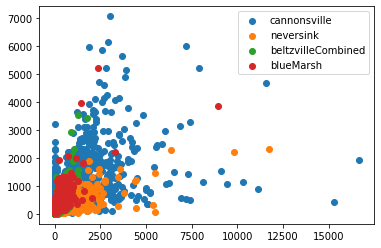

In [13]:
### compare catchment inflows to NHM estimates
reservoirs = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], nhm_matched[reservoir], label=reservoir)
plt.legend()

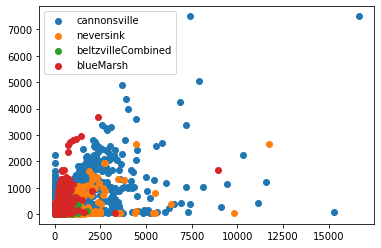

In [14]:
### compare catchment inflows to observed outflows
reservoirs = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], obs_outflow_matched[reservoir], label=reservoir)
plt.legend()

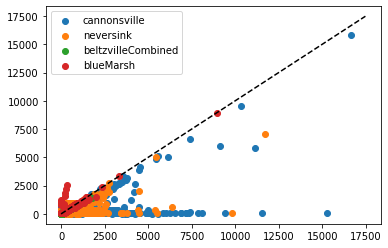

In [15]:
### compare catchment to outflow
fig, ax = plt.subplots(1)
for reservoir in reservoirs:
    plt.scatter(results[f'catchment_{reservoir}'], results[f'outflow_{reservoir}'], label=reservoir)
max_axis = max(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
plt.legend()

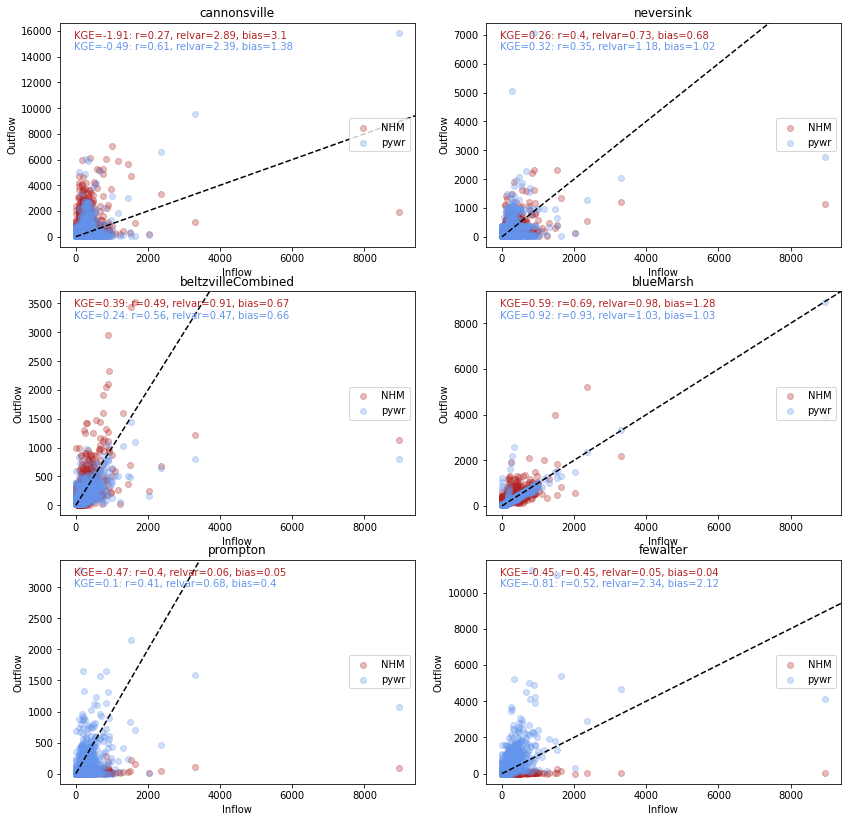

In [16]:
import hydroeval as he

### compare catchment inflows to observed, for nhm vs pywr
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh',  'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' 
    ax.scatter(results[f'catchment_{reservoir}'], nhm_matched[site], label='NHM', alpha=0.3, color='firebrick')
    ax.scatter(results[f'catchment_{reservoir}'], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
#     corr_nhm = corrcoef_nan_masked(results[f"catchment_{reservoir}"], nhm_matched[site])
#     nse_nhm = nse(results[f"catchment_{reservoir}"], nhm_matched[site])
#     corr_pywr = corrcoef_nan_masked(results[f"catchment_{reservoir}"], results[f"{prefix}_{site}"])
#     nse_pywr = nse(results[f"catchment_{reservoir}"], results[f"{prefix}_{site}"])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, nhm_matched[site], results[f"catchment_{reservoir}"])
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, results[f"{prefix}_{site}"], results[f"catchment_{reservoir}"])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    
#     ax.annotate(f'r = {corr_nhm}, {nse_nhm}',
#                     xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
#     ax.annotate(f'r = {corr_pywr}, {nse_pywr}',
#                     xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Inflow')
    ax.set_ylabel('Outflow')
    ax.set_title(site)


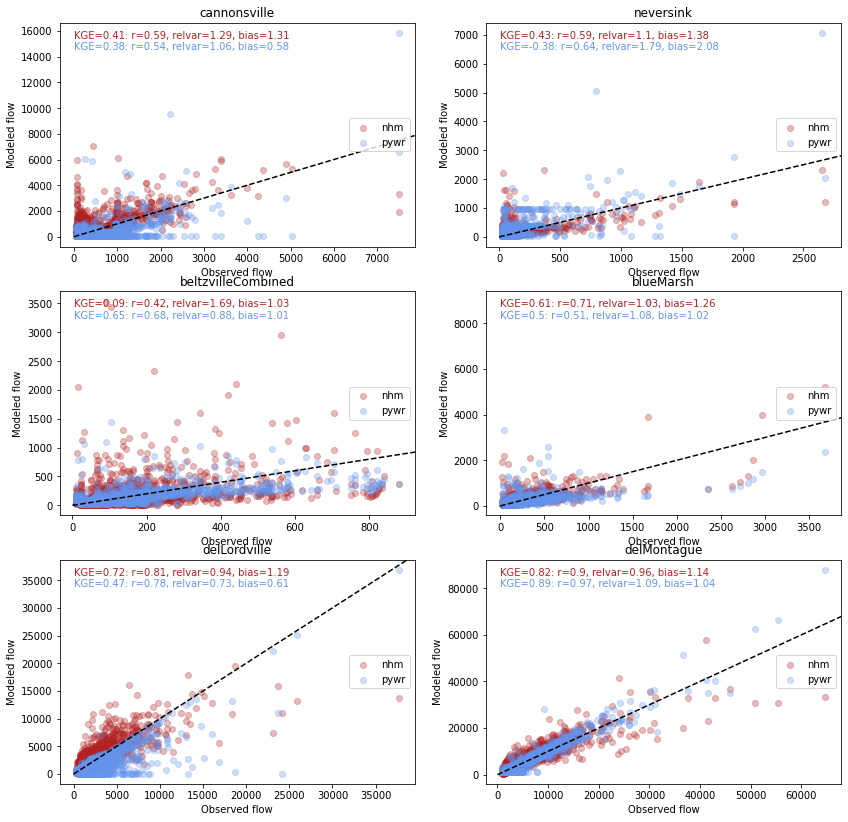

In [17]:

### compare observed flows to pywr output & nhm estimate 
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
# sites = ['pepacton', 'mongaupeCombined', 'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.scatter(obs_outflow_matched[site], nhm_matched[site], label='nhm', alpha=0.3, color='firebrick')
    ax.scatter(obs_outflow_matched[site], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, nhm_matched[site], obs_outflow_matched[site])
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, results[f"{prefix}_{site}"], obs_outflow_matched[site])
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Observed flow')
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


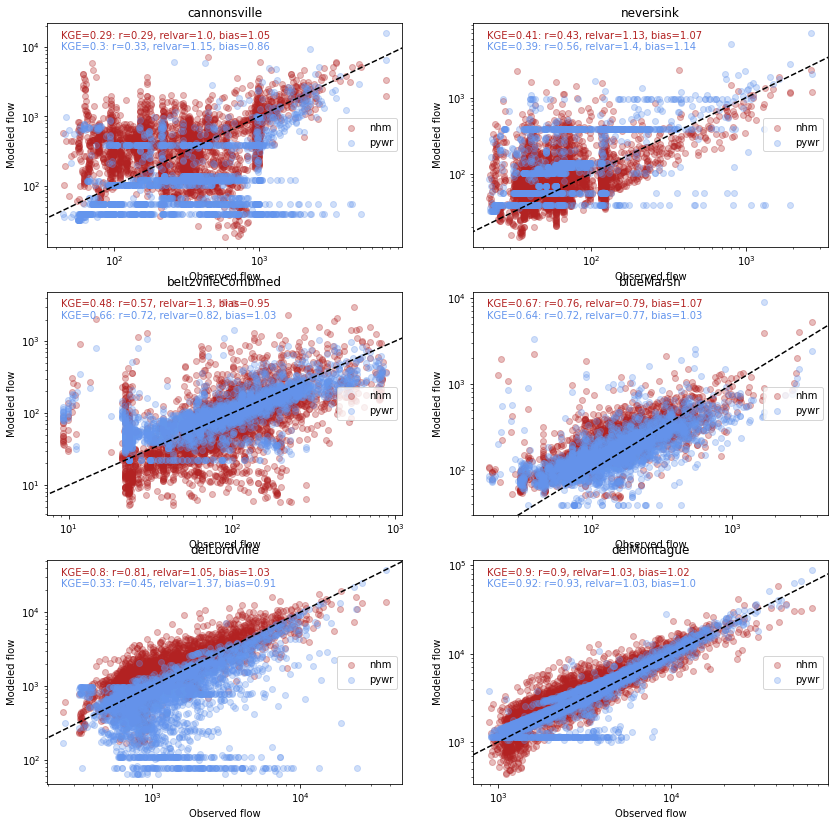

In [18]:

### compare observed flows to pywr output & nhm estimate , log scale
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
# sites = ['pepacton', 'mongaupeCombined', 'prompton', 'fewalter']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.scatter(obs_outflow_matched[site], nhm_matched[site], label='nhm', alpha=0.3, color='firebrick')
    ax.scatter(obs_outflow_matched[site], results[f'{prefix}_{site}'], label='pywr', alpha=0.3, color='cornflowerblue')
    ax.loglog()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    max_axis = max(xlim[1], ylim[1])
    ax.plot([0, max_axis], [0, max_axis], color='k', ls='--')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = he.evaluator(he.kge, np.log(nhm_matched[site]+0.01), np.log(obs_outflow_matched[site]+0.01))
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = he.evaluator(he.kge, np.log(results[f"{prefix}_{site}"]+0.01), np.log(obs_outflow_matched[site]+0.01))
    kge_nhm, r_nhm, alpha_nhm, beta_nhm = round(kge_nhm[0], 2), round(r_nhm[0], 2), round(alpha_nhm[0], 2), round(beta_nhm[0], 2)
    kge_pywr, r_pywr, alpha_pywr, beta_pywr = round(kge_pywr[0], 2), round(r_pywr[0], 2), round(alpha_pywr[0], 2), round(beta_pywr[0], 2)
    
    ax.annotate(f'KGE={kge_nhm}: r={r_nhm}, relvar={alpha_nhm}, bias={beta_nhm}',
                    xy = (0.04,0.93), xycoords=ax.transAxes, color = 'firebrick')
    ax.annotate(f'KGE={kge_pywr}: r={r_pywr}, relvar={alpha_pywr}, bias={beta_pywr}',
                    xy = (0.04,0.88), xycoords=ax.transAxes, color = 'cornflowerblue')
    ax.legend(loc='right')
    ax.set_xlabel('Observed flow')
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


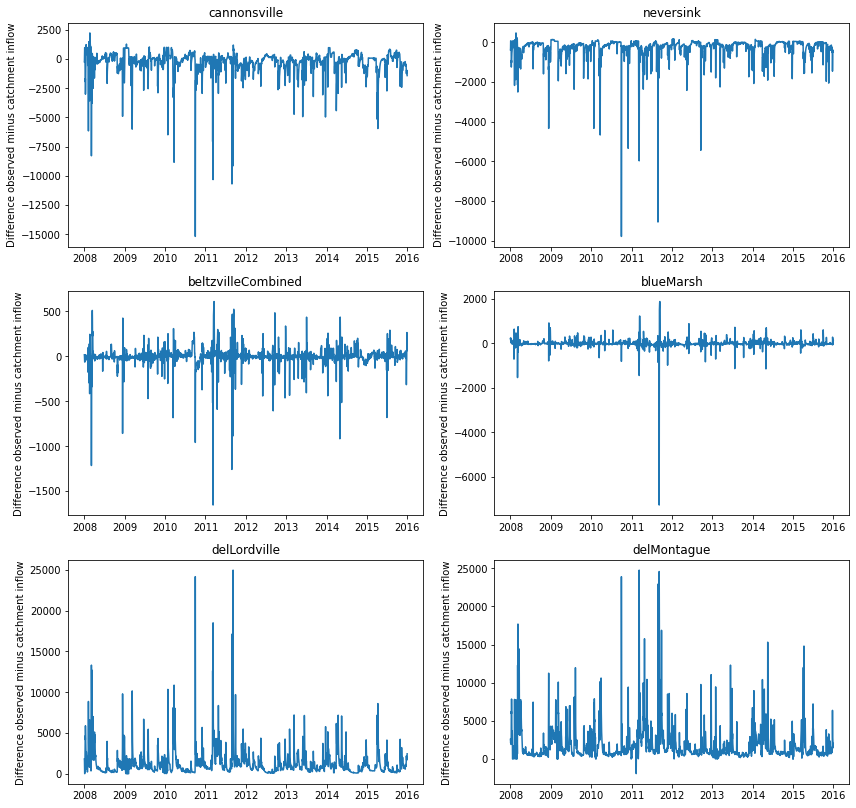

In [19]:
### compare pywr output to catchment inflow
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site] - results[f'catchment_{site}'], )
    ax.set_ylabel('Difference observed minus catchment inflow')
    ax.set_title(site)


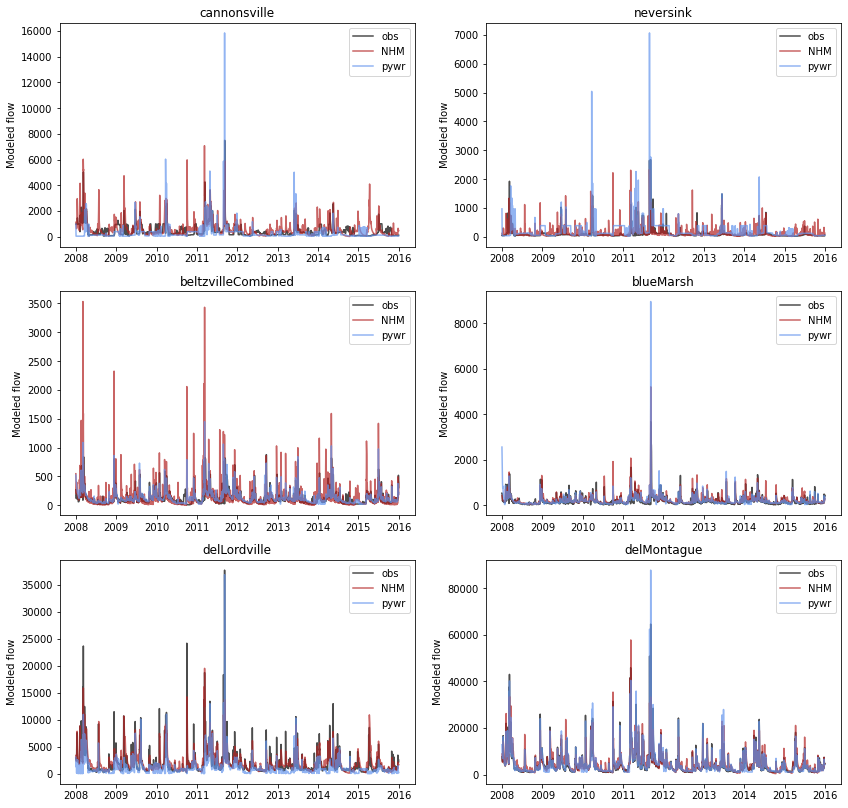

In [20]:
### compare NHM to observed, and pywr to observed
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site], label='obs', alpha=0.7, color='k')
    ax.plot(nhm_matched[site], label='NHM', alpha=0.7, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'], label='pywr', alpha=0.7, color='cornflowerblue')
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


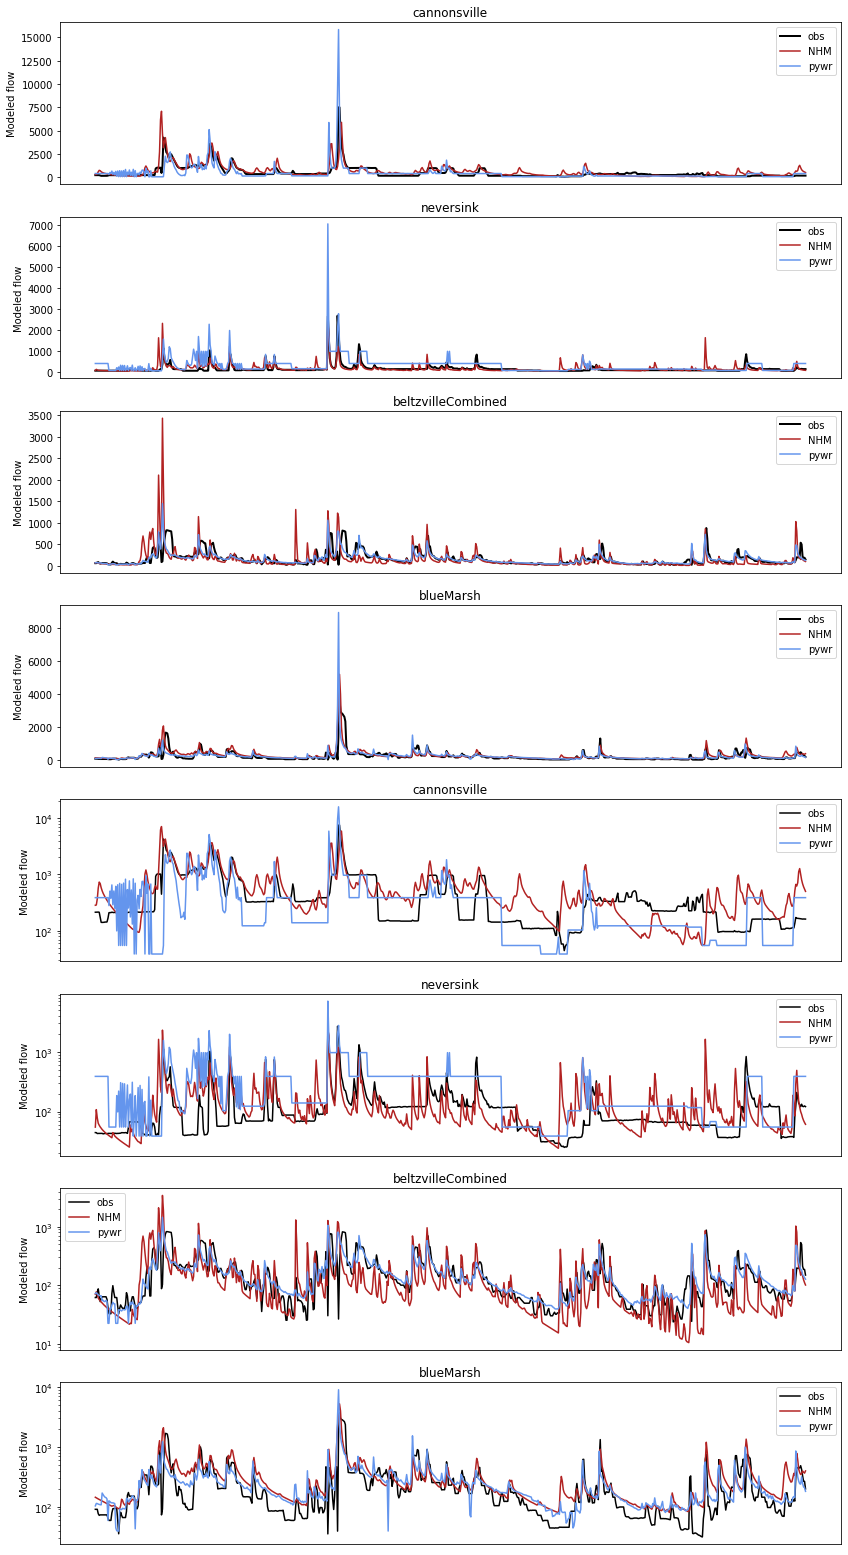

In [24]:
### compare NHM to observed, and pywr to observed
sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh']
fig, axs = plt.subplots(len(sites)*2,figsize=(14,28))

start_year = 2011
end_year = 2012
for i, site in enumerate(sites):
    ax = axs[i]
    prefix = 'outflow' 
    year_bool = np.logical_and(obs_outflow_matched.index.year >= start_year, obs_outflow_matched.index.year <= end_year)
    ax.plot(obs_outflow_matched[site].loc[year_bool], label='obs', alpha=1, lw=2, color='k')
    ax.plot(nhm_matched[site].loc[year_bool], label='NHM', alpha=1, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'].loc[year_bool], label='pywr', alpha=1, color='cornflowerblue')
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)
    ax.set_xticks([])
for i, site in enumerate(sites):
    ax = axs[i+len(sites)]
    prefix = 'outflow' 
    year_bool = np.logical_and(obs_outflow_matched.index.year >= start_year, obs_outflow_matched.index.year <= end_year)
    ax.plot(obs_outflow_matched[site].loc[year_bool], label='obs', alpha=1, color='k')
    ax.plot(nhm_matched[site].loc[year_bool], label='NHM', alpha=1, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'].loc[year_bool], label='pywr', alpha=1, color='cornflowerblue')
    ax.semilogy()
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)
    ax.set_xticks([])
    

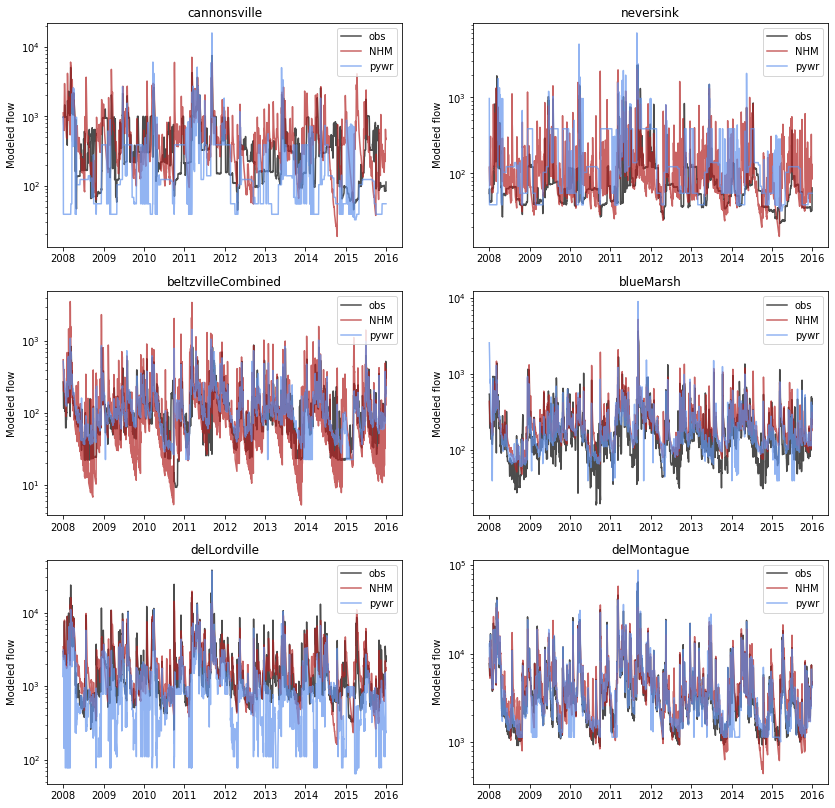

In [22]:
### compare NHM to observed, and pywr to observed, log scale
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'delLordville', 'delMontague']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    prefix = 'outflow' if i < 4 else 'link'
    ax.plot(obs_outflow_matched[site], label='obs', alpha=0.7, color='k')
    ax.plot(nhm_matched[site], label='NHM', alpha=0.7, color='firebrick')
    ax.plot(results[f'{prefix}_{site}'], label='pywr', alpha=0.7, color='cornflowerblue')
    ax.semilogy()
    ax.legend()
    ax.set_ylabel('Modeled flow')
    ax.set_title(site)


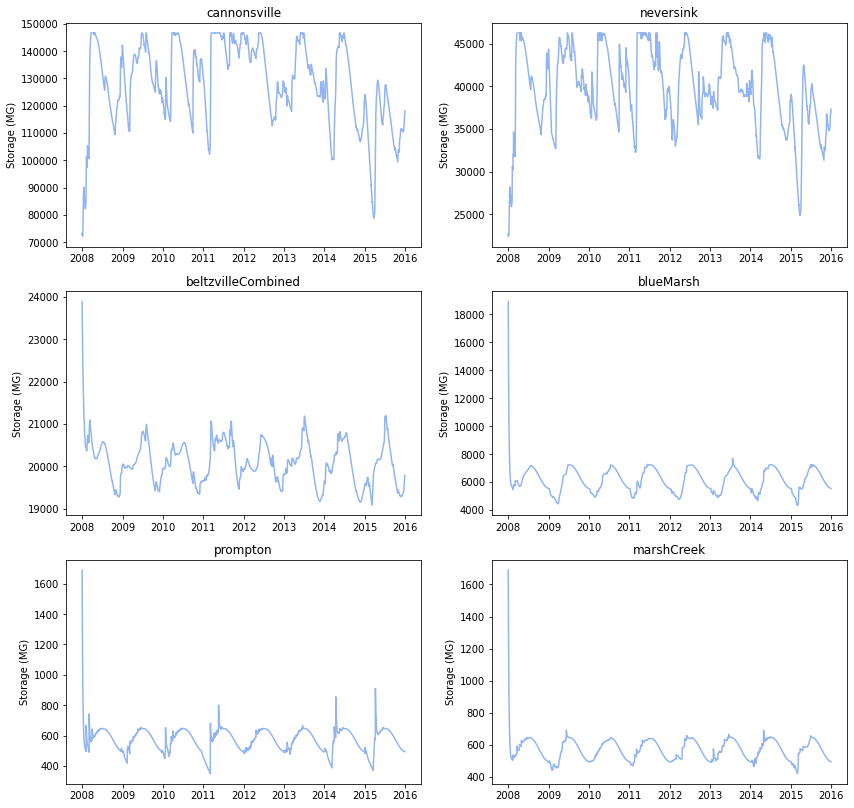

In [23]:
### plot storages
fig, axs = plt.subplots(3,2,figsize=(14,14))

sites = ['cannonsville', 'neversink', 'beltzvilleCombined', 'blueMarsh', 'prompton', 'marshCreek']
for i, site in enumerate(sites):
    row = 0 if i < 2 else 1 if i < 4 else 2
    col = 0 if i%2 == 0 else 1 
    col 
    ax = axs[row, col]
    ax.plot(results[f'reservoir_{site}'], alpha=0.7, color='cornflowerblue')
    ax.set_ylabel('Storage (MG)')
    ax.set_title(site)
